In [1]:
import numpy as np
import pandas as pd

credits=pd.read_csv("ratings.csv")
movies=pd.read_csv("movies.csv")

In [2]:
movies=movies.merge(credits,on='movieId')
movies.rename(columns={'movieId':'id'}, inplace=True)

In [3]:
movies.head()

,id,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         100836 non-null  int64  
 1   title      100836 non-null  object 
 2   genres     100836 non-null  object 
 3   userId     100836 non-null  int64  
 4   rating     100836 non-null  float64
 5   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ MB


# Data Preprocessing

train/test split and any technique that you think is neccessary (e.g., dropping too common or too uncommon items)

In [5]:
from sklearn.model_selection import train_test_split
movie_train,movie_test=train_test_split(movies,test_size=0.2,random_state=10)
print(movie_train.shape,'\n',movie_test.shape)

(80668, 6) 
 (20168, 6)


In [6]:
from collections import Counter
print(len(set(movies['id'])))
print(len(set(movies['userId'])))

9724
610


There are 9724 movies in our dataset and 100836 observations, so let's just drop some too common and too uncommon items.

In [7]:
# movies_freq=Counter(movies['id'])
# print(movies_freq.most_common()[0:10])#ids of most common items
# #as we can see the quantity ov ratings of most common movies are not too big so we can maintain them 
# print('\n')
# #(np.array(movies_freq.most_common()[-100:])[:,:1]).reshape(-1)#ids of most uncommon items

In [8]:
# #dropping some common and uncommon rows
# i = movies[movies.id.isin(np.array(movies_freq.most_common()[-10:])[:,:1].reshape(-1))].index
# movies.drop(i,inplace=True)
# print(movies.shape)

# Metrics

implement metrics to use - map@k, mar@k, coverage etc

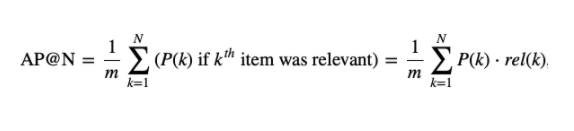

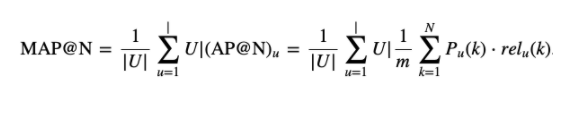

In [9]:
def apk(actual, predicted, k=10):
    if len(predicted)>k:
        predicted = predicted[:k]

    score = 0.0
    num_hits = 0.0

    for i,p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i+1.0)

    if not actual:
        return 0.0

    return score / min(len(actual), k)

In [10]:
def mapk(actual, predicted, k=10):
    return np.mean([apk(a,p,k) for a,p in zip(actual, predicted)])


# Popularity Based Filtering

Try getting most popular items (the higher average rating, or maybe also include number of views in that score, it is up to you) from training data and recommend them to users from test data. Get metric scores on test data. Any simple tricks to add to enhance some of the metrics?

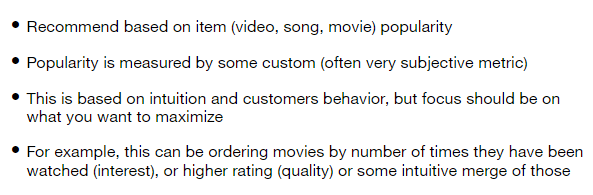

In [11]:
popular = movie_train.groupby('id').agg({'rating' : 'mean', 'userId' : 'count'}) 
#print(popular.head())
popular=popular.sort_values(by=['userId','rating'],  ascending=False)
popular.head()
index = popular.index
list_of_recs=(list(index))


In [12]:
merged=movie_test.merge(popular,on='id',how='left').fillna(2.5)
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20168 entries, 0 to 20167
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         20168 non-null  int64  
 1   title      20168 non-null  object 
 2   genres     20168 non-null  object 
 3   userId_x   20168 non-null  int64  
 4   rating_x   20168 non-null  float64
 5   timestamp  20168 non-null  int64  
 6   rating_y   20168 non-null  float64
 7   userId_y   20168 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.4+ MB


In [13]:
merged

,id,title,genres,userId_x,rating_x,timestamp,rating_y,userId_y
0,1733,Afterglow (1997),Drama|Romance,4,5.0,945079143,4.000000,2.0
1,3994,Unbreakable (2000),Drama|Sci-Fi,313,5.0,1030474839,3.525424,59.0
2,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,8,4.0,839463422,4.221519,237.0
3,99005,Fire with Fire (2012),Action|Crime|Drama,448,1.5,1396094584,2.500000,2.5
4,2951,"Fistful of Dollars, A (Per un pugno di dollari...",Action|Western,610,4.5,1479544792,3.730769,26.0
...,...,...,...,...,...,...,...,...
20163,96,In the Bleak Midwinter (1995),Comedy|Drama,474,3.5,1053020997,2.500000,2.5
20164,1201,"Good, the Bad and the Ugly, The (Buono, il bru...",Action|Adventure|Western,61,4.5,1145532700,4.209091,55.0
20165,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical,527,5.0,1033175105,3.809524,147.0
20166,230,Dolores Claiborne (1995),Drama|Thriller,290,3.0,974943209,3.404762,21.0


In [14]:
np.sqrt(np.mean((merged['rating_x']-merged['rating_y'])**2))

0.9911068940163392

In [15]:
avg_rates = movie_train.groupby('id')['rating'].mean()
n_rates = movie_train.groupby('id')['userId'].count()
avg_rates = 5*(avg_rates*n_rates - avg_rates*n_rates.min())/(avg_rates*n_rates.max() - avg_rates*n_rates.min())
avg_rates = avg_rates.to_frame()
avg_rates.columns = ['rating_y']

pred = movie_test.merge(avg_rates, on='id', how='left')[['userId', 'rating', 'rating_y']].fillna(movie_train.rating.mean())
np.sqrt(np.mean((pred['rating'] - pred['rating_y'])**2))

2.8734987290313345

In [16]:
def user_relevant(test,id):
    return movie_test[movie_test.userId.isin([id])]['id']

print(apk(list_of_recs,user_relevant(movie_test,2)))

0.788888888888889


# Content Based Filtering

Recall theory and make content based recommendations

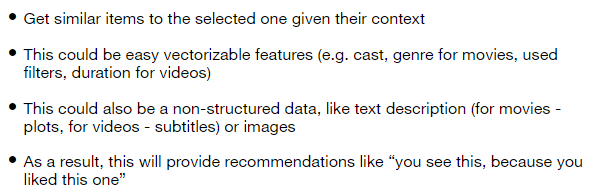

# Create a user-item interaction matrix

easy way: https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html

In [17]:
ui_table = pd.pivot_table(movies, values='rating', index=['userId'],columns=['id'])
ui_table.fillna(0,inplace=True)
ui_table

id,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,2.5,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
#isinstance(ui_table,pd.core.frame.DataFrame)

In [19]:
ui_table.to_numpy()

array([[4. , 0. , 4. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [2.5, 2. , 2. , ..., 0. , 0. , 0. ],
       [3. , 0. , 0. , ..., 0. , 0. , 0. ],
       [5. , 0. , 0. , ..., 0. , 0. , 0. ]])

# Your Matrix Factorization

Build a class for providing recommendations based on matrix factorization algorithms.

In [20]:
from MF import MF 

In [21]:
model=MF(R=ui_table, K=3, alpha=0.01, beta=0.00001, max_iter=20)

In [22]:
model.train()

array([[4.59, 4.53, 3.65, ..., 4.01, 3.97, 4.72],
       [3.6 , 3.5 , 2.79, ..., 3.03, 3.05, 3.76],
       [1.54, 1.75, 0.95, ..., 1.65, 1.53, 2.06],
       ...,
       [3.86, 3.75, 3.5 , ..., 3.53, 3.73, 4.28],
       [3.46, 3.36, 2.61, ..., 2.92, 2.93, 3.67],
       [4.03, 3.94, 3.3 , ..., 3.56, 3.61, 4.29]])